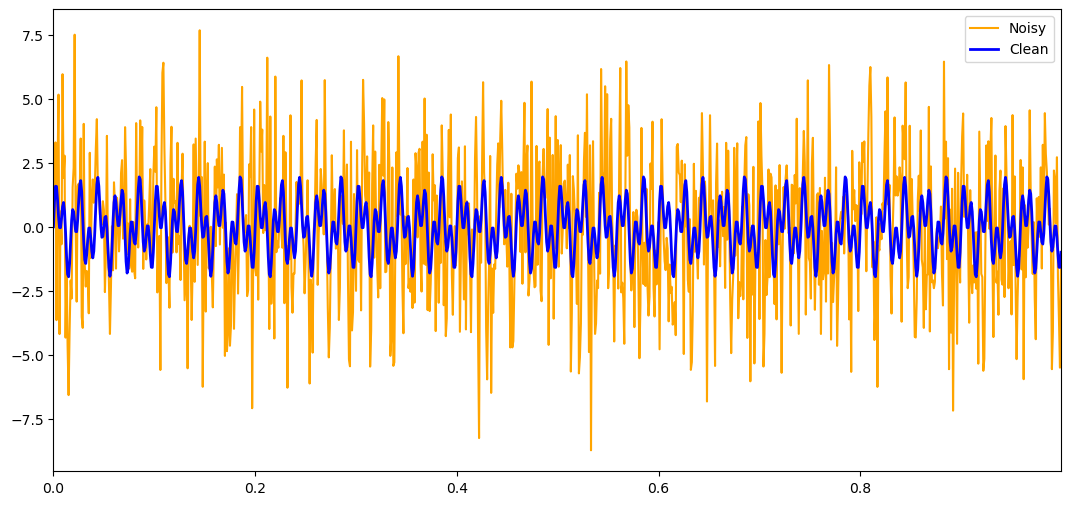

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # sum of 2 freq

f_clean = f
f = f+2.5*np.random.randn(len(t)) # Add some noise


#plot
plt.figure(figsize=(13,6))
plt.plot(t,f,color = 'orange', linewidth = 1.5, label = 'Noisy')
plt.plot(t,f_clean,color = 'b', linewidth = 2, label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()

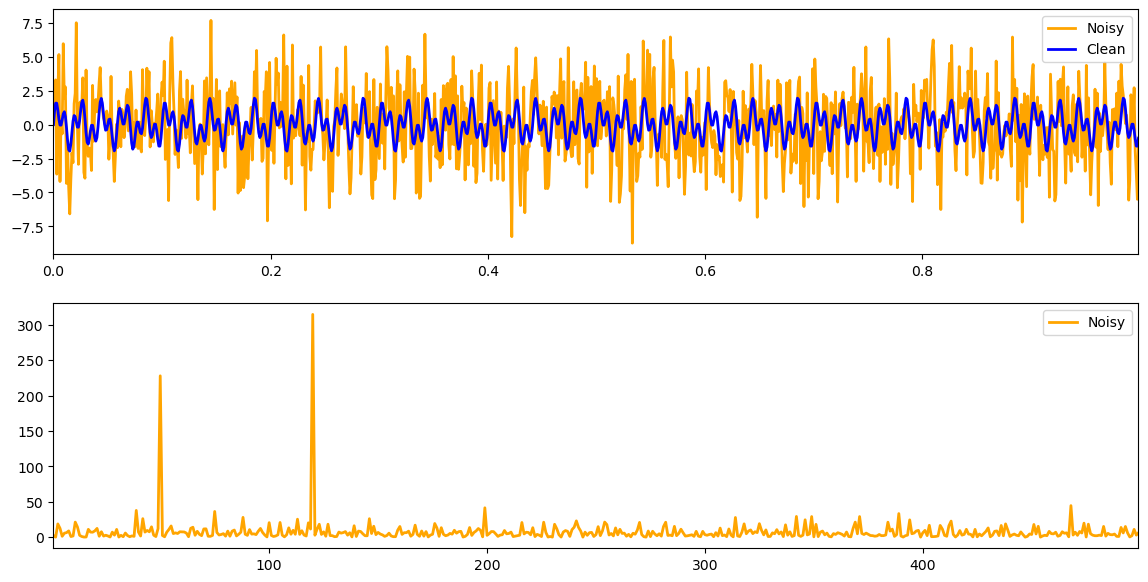

In [34]:

n = len(t)
fhat = np.fft.fft(f,n) # compute the fft

## power spectral density (power bc norm*conj per frequency)
PSD = fhat * np.conj(fhat) / n # power spectrum

freq = (1/(dt*n)) *np.arange(n) # create x-axis for freq
L = np.arange(1,np.floor(n/2), dtype = 'int') # only plot the first half

fig,axis = plt.subplots(2,1, figsize = (14,7))

plt.sca(axis[0])
plt.plot(t,f,color = 'orange', linewidth = 2, label = "Noisy")
plt.plot(t,f_clean,color = 'blue', linewidth = 2, label = "Clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(freq[L], PSD[L], color = 'orange', linewidth = 2, label = "Noisy")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

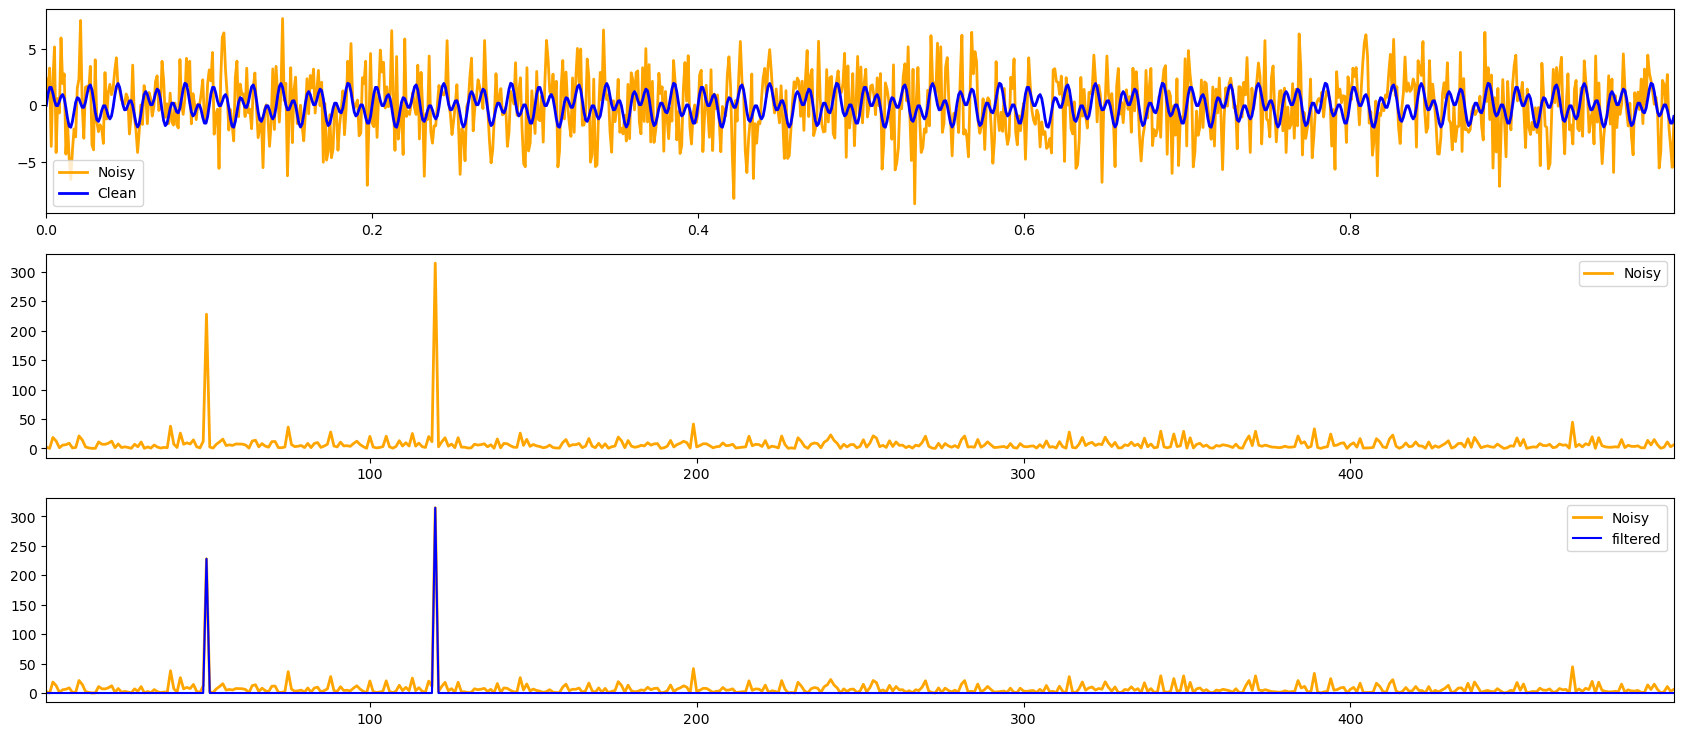

In [45]:
## Use the {SD tp fo;ter pit the noise

indices = PSD > 100 # find all freq with large power (50,120)
PSDClean = PSD * indices # make all other zero (False * num = 0)
fhat = indices * fhat # zero out small Fourier coeff
ffilt = np.fft.ifft(fhat) # inverse FFT for filtered time signal

### plot EVERYTHING!!!!

fig,axis = plt.subplots(3,1, figsize = (21,9))

plt.sca(axis[0])
plt.plot(t,f,color = 'orange', linewidth = 2, label = "Noisy")
plt.plot(t,f_clean,color = 'blue', linewidth = 2, label = "Clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(freq[L], PSD[L], color = 'orange', linewidth = 2, label = "Noisy")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.sca(axis[2])
plt.plot(freq[L], PSD[L], color = 'orange', linewidth = 2, label = "Noisy")
plt.plot(freq[L], PSDClean[L], color = 'blue', linewidth = 1.5, label = "filtered")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()